# Problem Statement

This is a fictional data set created by IBM data scientists. We need to uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

#### Various features are defined below

#### Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
#### EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#### JobInvolvement  1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#### JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#### PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
#### RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#### WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## Reading and Understanding the Data

In [1]:
#Importing the packages
#Data processing packages
import numpy as np
import pandas as pd

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns


# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
hr = pd.read_csv("C:/Users/hp/Desktop/hr.csv")

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
hr.shape

(1470, 35)

In [6]:
sum(hr.duplicated(subset = 'EmployeeNumber')) == 0

True

In [7]:
print (hr.isnull().values.any())

False


In [8]:
hr.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Cleaning & EDA

There is no data cleaning required. We will derive few new metrics for better analysis.

In [10]:
hr_categorical = hr.columns[hr.dtypes=='object']
print(hr_categorical)
print(hr_categorical.shape)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
(9,)


In [11]:
hr_numeric = hr.columns[hr.dtypes!='object']
print(hr_numeric)
print(hr_numeric.shape)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
(26,)


In [12]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


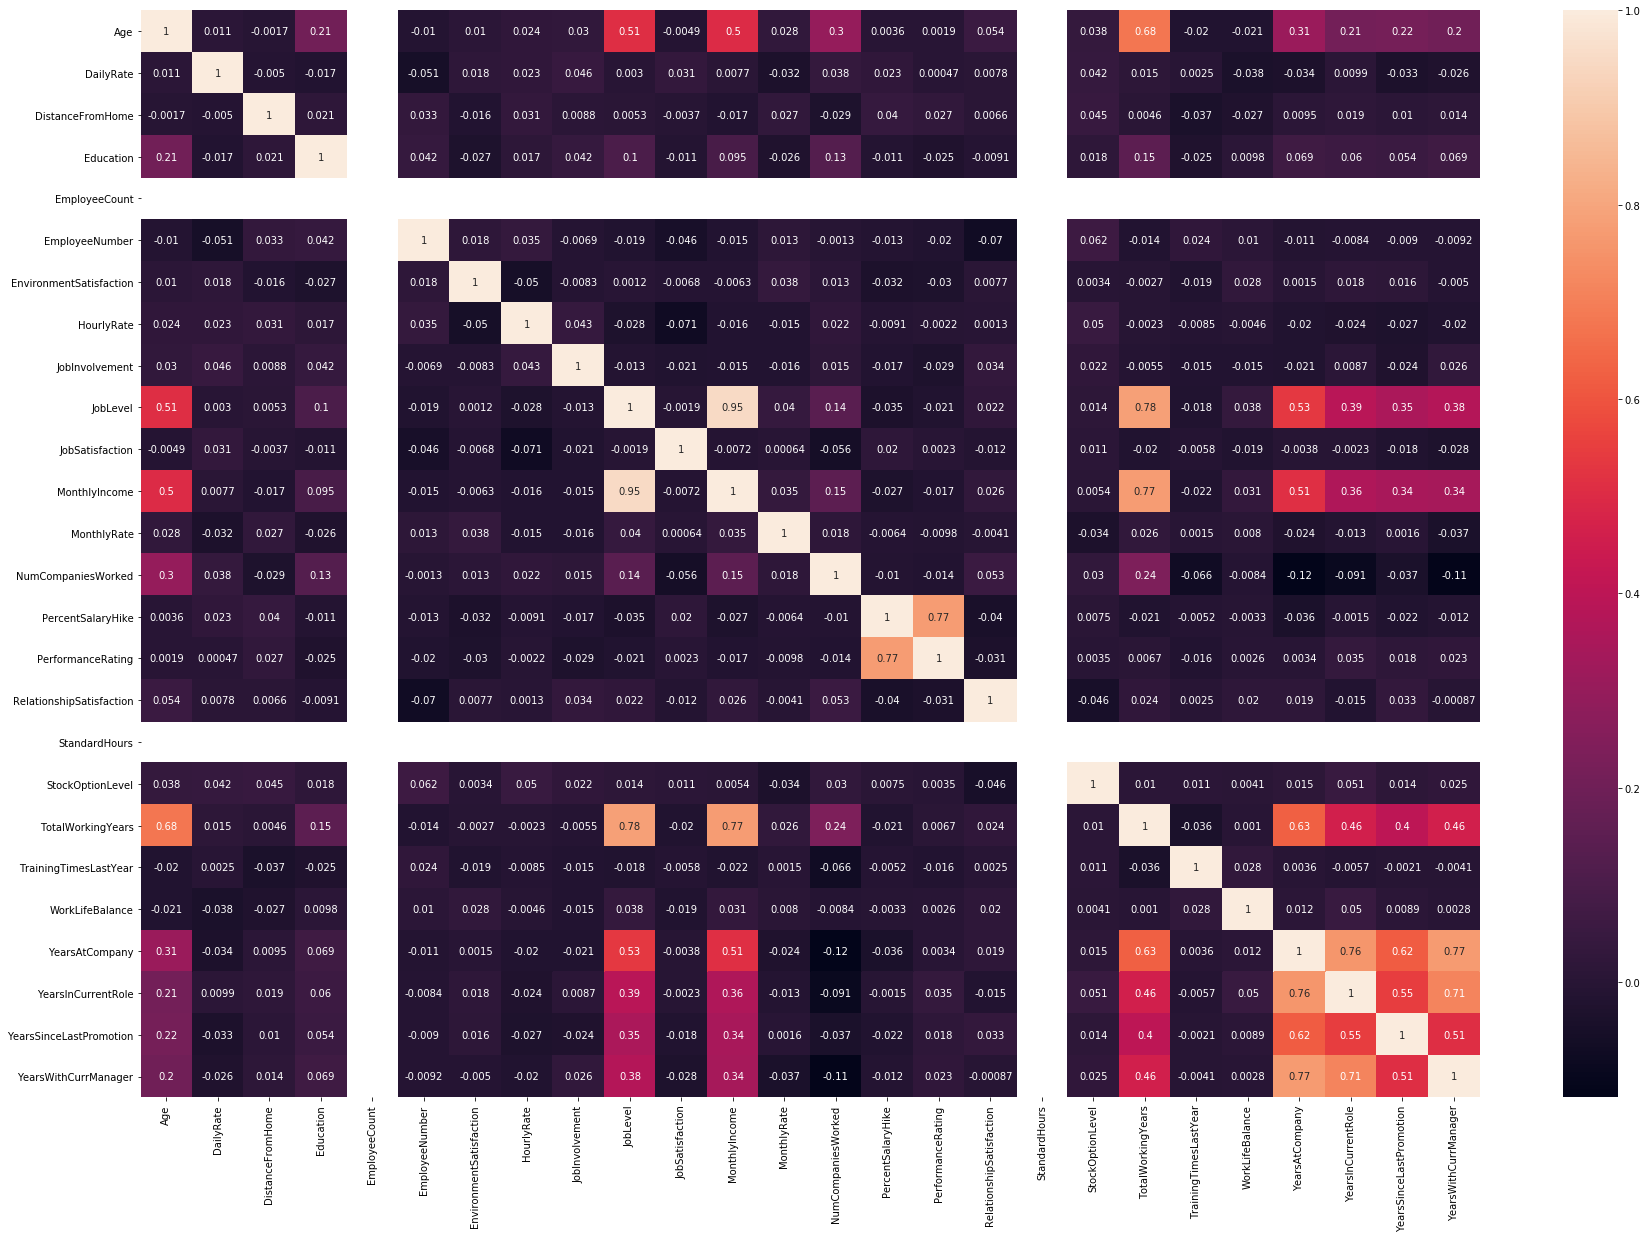

In [13]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        

# Size of the figure
sns.heatmap(hr.corr(),annot = True)
plt.show()

In [14]:
#Find attrition size 

hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

237 employees left the company out of total 1470 employees

In [15]:
hr["DistanceFromHome_title"] = pd.cut(hr.DistanceFromHome,[-1,5,10,20,30], labels=['Very near','near','far','very far'])


Attrition,No,Yes
DistanceFromHome_title,,
Very near,0.86,0.14
near,0.86,0.14
far,0.8,0.2
very far,0.78,0.22
All,0.84,0.16


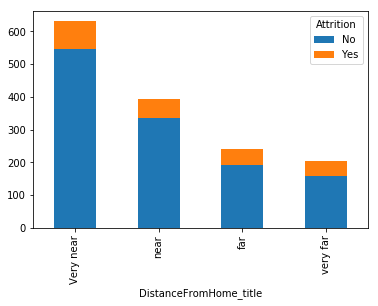

In [16]:
hr.groupby('DistanceFromHome_title')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.DistanceFromHome_title, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### The employees living "very far" from office are more likely to leave the organisation. 

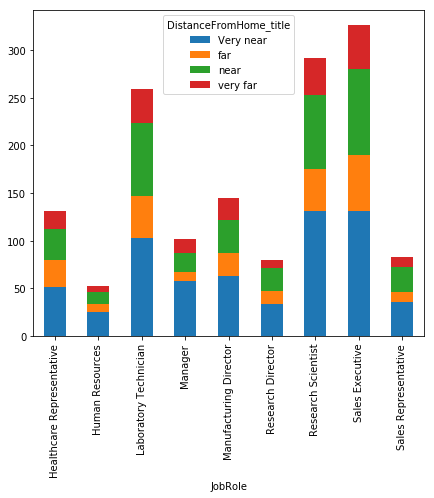

In [17]:
hr.groupby('JobRole')['DistanceFromHome_title']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, figsize=(7,6))

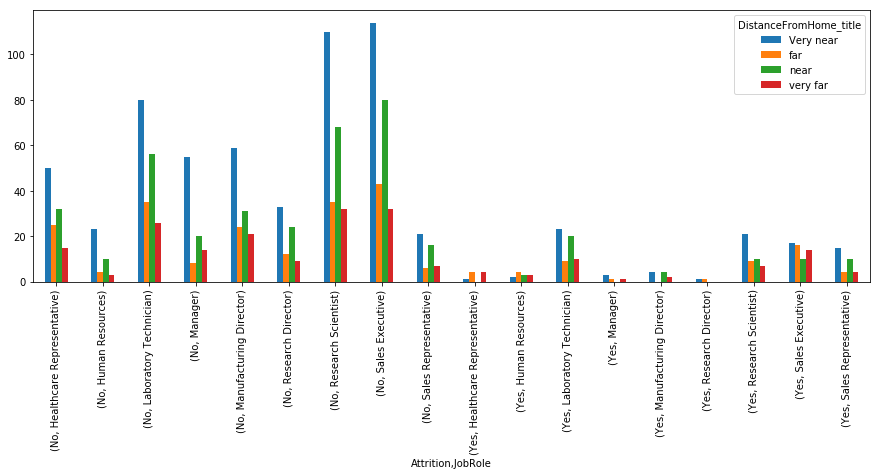

In [18]:
hr1 = hr.groupby(["Attrition","JobRole"]).DistanceFromHome_title.value_counts().unstack()
hr1.plot(kind="bar",align='center', alpha=1.0,figsize=(15,5))

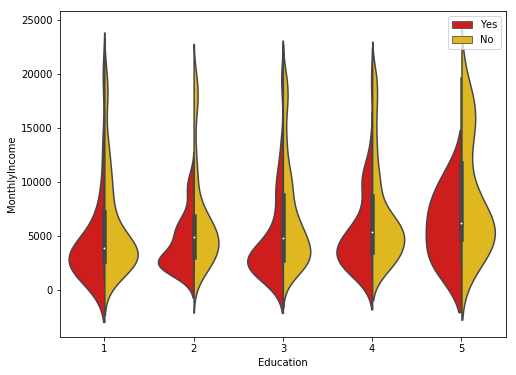

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
sns.violinplot(x = 'Education',y = 'MonthlyIncome',data=hr, hue='Attrition',split=True,palette='hot')
plt.legend(loc='best')
plt.show()

Attrition,No,Yes
Age_grp,,
Teenager,0.43,0.57
20s,0.77,0.23
30s,0.86,0.14
40s,0.89,0.11
50s,0.87,0.13
All,0.84,0.16


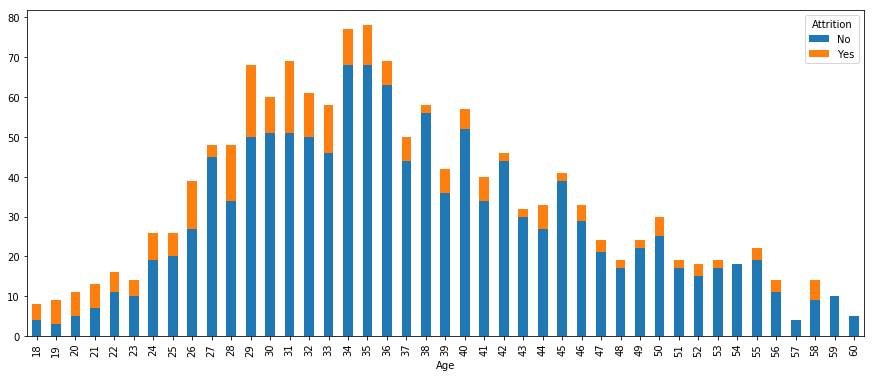

In [20]:
hr.groupby('Age')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, figsize=(15,6))

hr["Age_grp"] = pd.cut(hr.Age,[-1,20,30,40,50,60], labels=['Teenager','20s','30s','40s','50s'])

pd.crosstab(hr.Age_grp, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Teenagers are more likely to leave the organisation. 

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.93,0.07
Human Resources,0.77,0.23
Laboratory Technician,0.76,0.24
Manager,0.95,0.05
Manufacturing Director,0.93,0.07
Research Director,0.98,0.02
Research Scientist,0.84,0.16
Sales Executive,0.83,0.17
Sales Representative,0.6,0.4


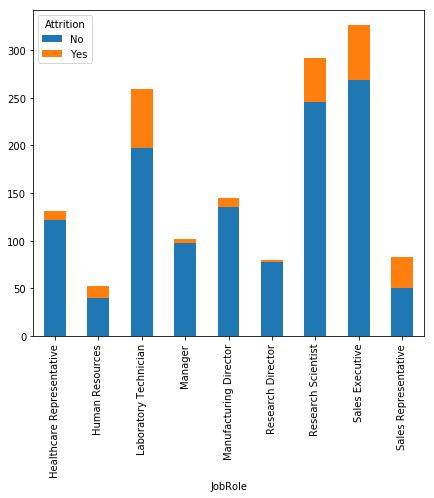

In [21]:
hr.groupby('JobRole')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, figsize=(7,6))
pd.crosstab(hr.JobRole, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Sales Representative are more likely to leave the organisation. 

Attrition,No,Yes
Education,,
1,0.82,0.18
2,0.84,0.16
3,0.83,0.17
4,0.85,0.15
5,0.9,0.1
All,0.84,0.16


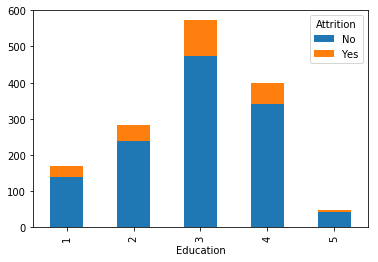

In [22]:
hr.groupby('Education')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.Education, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

###### Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

### Employees with below college education are more likely to leave the organisation.

Attrition,No,Yes
EducationField,,
Human Resources,0.74,0.26
Life Sciences,0.85,0.15
Marketing,0.78,0.22
Medical,0.86,0.14
Other,0.87,0.13
Technical Degree,0.76,0.24
All,0.84,0.16


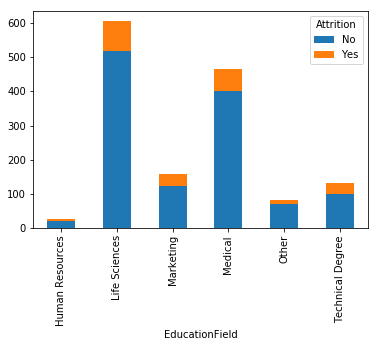

In [23]:
hr.groupby('EducationField')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.EducationField, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Employees with Human Resources & Technical Degree are more likely to leave the organisation.

Attrition,No,Yes
Department,,
Human Resources,0.81,0.19
Research & Development,0.86,0.14
Sales,0.79,0.21
All,0.84,0.16


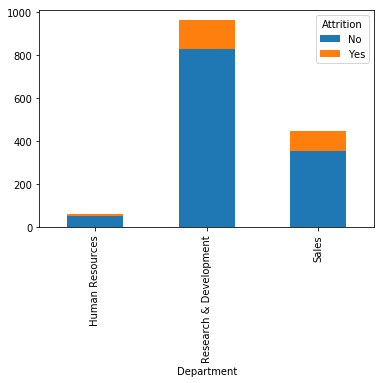

In [24]:
hr.groupby('Department')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.Department, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Employees from Sales Department are more likely to leave the organisation.

Attrition,No,Yes
Gender,,
Female,0.85,0.15
Male,0.83,0.17
All,0.84,0.16


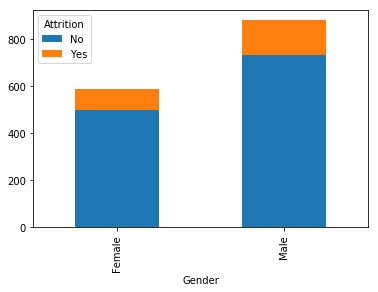

In [25]:
hr.groupby('Gender')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.Gender, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Gender doesn't play major role in employee's attrition

Attrition,No,Yes
MaritalStatus,,
Divorced,0.9,0.1
Married,0.88,0.12
Single,0.74,0.26
All,0.84,0.16


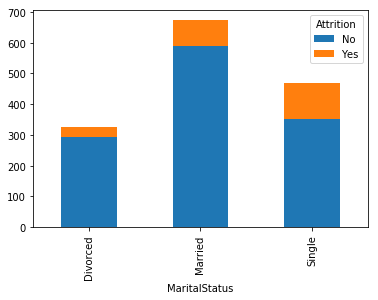

In [26]:
hr.groupby('MaritalStatus')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.MaritalStatus, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Singles are more likely to leave the organisation

Attrition,No,Yes
OverTime,,
No,0.9,0.1
Yes,0.69,0.31
All,0.84,0.16


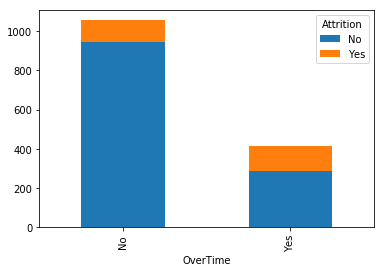

In [27]:
hr.groupby('OverTime')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.OverTime, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Employees who are doing overtime are more likely to leave the organisation.

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.92,0.08
Travel_Frequently,0.75,0.25
Travel_Rarely,0.85,0.15
All,0.84,0.16


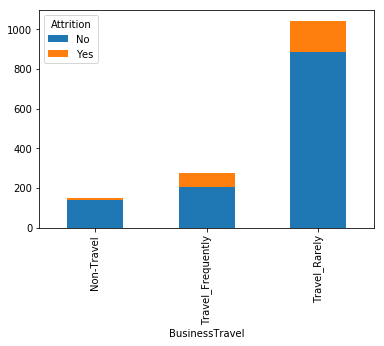

In [28]:
hr.groupby('BusinessTravel')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
pd.crosstab(hr.BusinessTravel, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Employees who travel_Frequently are more likely  to leave the organisation.

Attrition,No,Yes
JobSatisfaction,,
1,0.77,0.23
2,0.84,0.16
3,0.83,0.17
4,0.89,0.11
All,0.84,0.16


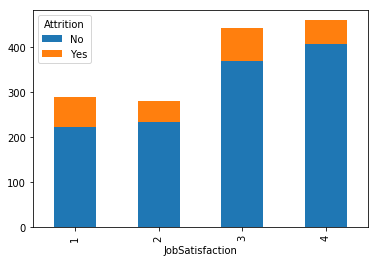

In [29]:
hr.groupby('JobSatisfaction')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.JobSatisfaction, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

#### JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

### Employees with low job satisfaction are more likely to leave the organisation.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.75,0.25
2,0.85,0.15
3,0.86,0.14
4,0.87,0.13
All,0.84,0.16


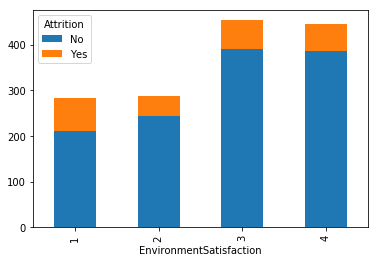

In [30]:
hr.groupby('EnvironmentSatisfaction')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.EnvironmentSatisfaction, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

#### EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

### Employees with low Environment satisfaction are more likely  to leave the organisation.

Attrition,No,Yes
JobInvolvement,,
1,0.66,0.34
2,0.81,0.19
3,0.86,0.14
4,0.91,0.09
All,0.84,0.16


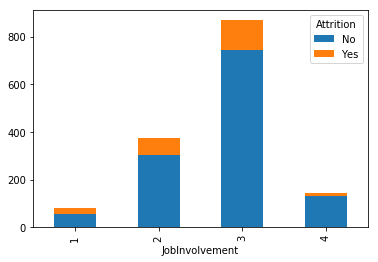

In [31]:
hr.groupby('JobInvolvement')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.JobInvolvement, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

#### JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

### Employees with low Job Involvement are more likely  to leave the organisation.

Attrition,No,Yes
PerformanceRating,,
3,0.84,0.16
4,0.84,0.16
All,0.84,0.16


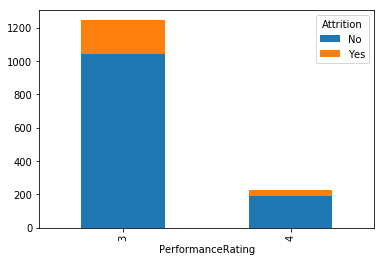

In [32]:
hr.groupby('PerformanceRating')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.PerformanceRating, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Performance rating doesn't affect the attrition.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.79,0.21
2,0.85,0.15
3,0.85,0.15
4,0.85,0.15
All,0.84,0.16


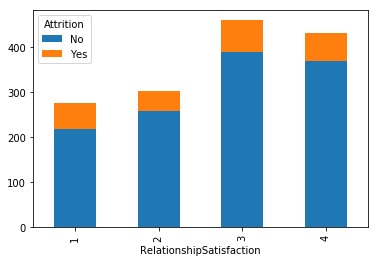

In [33]:
hr.groupby('RelationshipSatisfaction')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.RelationshipSatisfaction, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

#### RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

### Employees with low Relationship Satisfaction are more likely  to leave the organisation.

Attrition,No,Yes
WorkLifeBalance,,
1,0.69,0.31
2,0.83,0.17
3,0.86,0.14
4,0.82,0.18
All,0.84,0.16


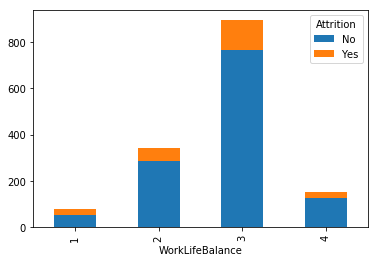

In [34]:
hr.groupby('WorkLifeBalance')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.WorkLifeBalance, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

#### WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

### Employees with Bad Work Life Balance are more likely  to leave the organisation.

Attrition,No,Yes
NumCompaniesWorked_grp,,
Less than 5,0.85,0.15
More than 5,0.78,0.22
All,0.84,0.16


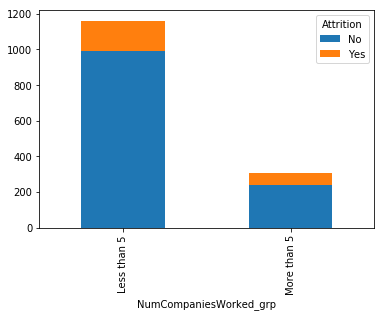

In [35]:
hr["NumCompaniesWorked_grp"] = pd.cut(hr.NumCompaniesWorked,[-1,4,9], labels=['Less than 5','More than 5'])


hr.groupby('NumCompaniesWorked_grp')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.NumCompaniesWorked_grp, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')

### Employees who have worked in more than 5 companies are more likely to leave the organisation

Attrition,No,Yes
StockOptionLevel,,
0,0.76,0.24
1,0.91,0.09
2,0.92,0.08
3,0.82,0.18
All,0.84,0.16


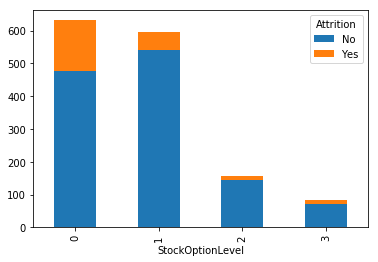

In [36]:
hr.groupby('StockOptionLevel')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.StockOptionLevel, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')


### Employees with 0 Stock option level are more likely to leave the organisation

Attrition,No,Yes
MonthlyIncome_grp,,
"0-5,000",0.78,0.22
"5,001-10,000",0.89,0.11
"10,001-15,000",0.86,0.14
"15,001-20,000",0.96,0.04
All,0.84,0.16


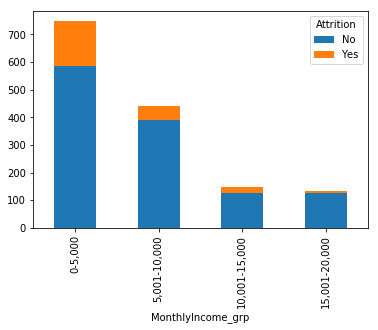

In [37]:
hr["MonthlyIncome_grp"] = pd.cut(hr.MonthlyIncome,[-1,5000,10000,15000,20000], labels=['0-5,000','5,001-10,000','10,001-15,000','15,001-20,000'])


hr.groupby('MonthlyIncome_grp')['Attrition']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

pd.crosstab(hr.MonthlyIncome_grp, hr.Attrition, margins=True, normalize='index').round(2).style.background_gradient(cmap='spring')


### Employees with monthly income slab of Rupees 0-5,000  are more likely to leave the organisation.

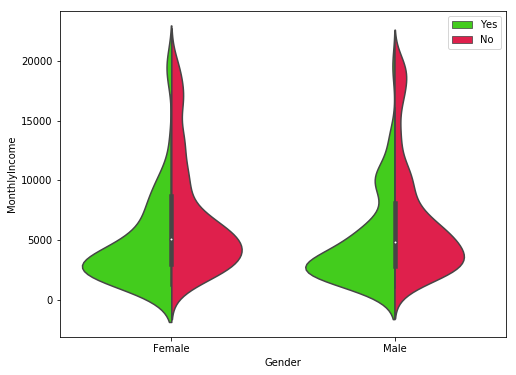

In [38]:
fig,ax = plt.subplots(figsize=(8,6))
sns.violinplot(x = 'Gender',y = 'MonthlyIncome',data=hr, hue='Attrition',split=True,palette='prism')
plt.legend(loc='best')
plt.show()

### Both Male & Female employees with monthly income slab of Rupees 0-5,000 are more likely to leave the organisation.